# Assignment 1

In [20]:
name = "Faran Taimoor Butt"
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [21]:
# your code here
def my_function(model, company="Unknown", *specs, color="Unknown", **other_info):
    '''
    Function: Get the description of a car

    Parameters:
    - company: str = The company of the car (Default="Unknown")
    - model: str = The model of the car (e.g., 1996, 1997, 2014, etc.)
    - specs: tuple = Additional specifications of the car (e.g., hp, rim size, etc.)
    - color: str = The color of the car (Default: "Unknown")
    - other_info: dict = Other information about the car

    Returns:
    - str: A string description of the car
    '''
    description = f'{company} is of {color} color.'
    if specs:
        description += f' Specs: {", ".join(specs)}.'
    if other_info:
        other_details = ', '.join(f'{key}: {value}' for key, value in other_info.items())
        description += f' Additional Info: {other_details}.'
    return description


## Exercise 1


In [22]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    # your code here
    if n <= 1:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True
is_prime(6)

False

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [23]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in)
    and print the following data:
    the name of the analyzed function,
    the name of all the arguments it takes
    and their types (positional, keyword, etc.)
    """
    # your code here
    if not callable(func):
        raise TypeError("Provided Arguemnt if not a function")
    func_name = func.__name__
    signature = inspect.signature(func)
    parameters = signature.parameters
    print(f"Function name: {func_name}")
    print(f'function parameters: {parameters}')

    for param_name,param in parameters.items():
        kind = param.kind
        default = param.default if param.default is not inspect.Parameter.empty else "No Default"
        print(f' - {param_name} - {kind} - {default}')
inspect_function(my_function)

Function name: my_function
function parameters: OrderedDict({'model': <Parameter "model">, 'company': <Parameter "company='Unknown'">, 'specs': <Parameter "*specs">, 'color': <Parameter "color='Unknown'">, 'other_info': <Parameter "**other_info">})
 - model - POSITIONAL_OR_KEYWORD - No Default
 - company - POSITIONAL_OR_KEYWORD - Unknown
 - specs - VAR_POSITIONAL - No Default
 - color - KEYWORD_ONLY - Unknown
 - other_info - VAR_KEYWORD - No Default


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message.

In [24]:
from datetime import datetime
from time import sleep

# wrong function
def my_time_now(msg, *, dt = None):
    if dt is None:
        dt =  datetime.now()
    print(msg,dt)

my_time_now("date and time now is: ")
sleep(2)
my_time_now("After 2 seconds date and time is: ")


date and time now is:  2025-01-18 23:23:30.297036
After 2 seconds date and time is:  2025-01-18 23:23:32.302583


In [25]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2025-01-18 23:23:32.312504
The time is now:  2025-01-18 23:23:33.317808
The time is now:  2025-01-18 23:23:34.319153


## Exercise 4

In [26]:
def limit(input_generator, max_count):
    count = 0
    for value in input_generator:
        if count >= max_count:
            break
        yield value
        count += 1

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [27]:
# your code here
def pascal_triangle():
    row = [1]
    while True:
        for num in row:  
            yield num
        row = [1] + [row[i] + row[i + 1] for i in range(len(row) - 1)] + [1]
list(limit(pascal_triangle(), 20))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5]

## Exercise 6


In [28]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """
    # your code here
    path = pathlib.Path(path_to_dir)
    files = [(file.name,file.stat().st_size) for file in path.iterdir() if file.is_file()]
    sorted_files = sorted(files,key = lambda x:(x[1],x[0]))
    return sorted_files
if __name__ == '__main__':
    path = '/Users/mac/Desktop/Books/machine learning'
    sortedfiles = files_sorted_by_size(path)
    for file in sortedfiles:
        print(file)


('8c5751f-bc8f-065c-cda5-633ab7ad5b_DS_Roadmap.pdf', 767830)
('Timothy Masters - Modern Data Mining Algorithms in C++ and CUDA C_ Recent Developments in Feature Extraction and Selection Algorithms for Data Science-Apress (2020).pdf', 2372007)
('Large Scale Machine Learning.pdf', 4561261)
('Data Science from Scratch- First Principles with Python.pdf', 5842217)
('Foundations of Machine Learning.pdf', 6224448)
('Soledad Galli - Python Feature Engineering Cookbook_ Over 70 Recipes for Creating, Engineering, and Transforming Features to Build Machine Learning Models-Packt Publishing Ltd (2020).pdf', 8725510)
('statistical learning theory.pdf', 13201614)
('Machine Learning Design Interview_ Machine Learning System Design Interview-Independently published (2022).pdf', 15539730)
("Chip Huyen - Designing Machine Learning Systems_ An Iterative Process for Production-Ready Applications-O'Reilly Media (2022).pdf", 16238412)
('SEBASTIAN LIU YUXI (HAYDEN) MIRJALILI VAHID RASCHKA - MACHINE LEARNING W

## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [29]:
import heapq
def merge_sorter(*args):
    # your code here
    ite = [iter(arg) for arg in args]
    heap = []
    for i,it in enumerate(ite):
        try:
            value = next(it)
            heapq.heappush(heap,(value,i))
        except StopIteration:
            pass
    while heap:
        value,i = heapq.heappop(heap)
        yield value
        try:
            next_value = next(ite[i])
            heapq.heappush(heap,(next_value,i))
        except StopIteration:
            pass

s1 = [1,4,7]
s2 = [3,5,9]
s3 = [2,6,8]
merged = (merge_sorter(s1,s2,s3))
print(list(merged))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [45]:
import functools
import time

def profiler(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if wrapper.call_depth == 0:
            
            wrapper.calls = 0
            wrapper.last_time_taken = 0.0
            wrapper.call_depth = 0
            start_time = time.time()
            wrapper.call_depth += 1
            try:
                result = func(*args, **kwargs)
            finally:
                wrapper.last_time_taken = time.time() - start_time
                wrapper.call_depth -= 1
            return result
        else:
            
            wrapper.calls += 1
            wrapper.call_depth += 1
            try:
                result = func(*args, **kwargs)
            finally:
                wrapper.call_depth -= 1
            return result
    wrapper.calls = 0
    wrapper.last_time_taken = 0.0
    wrapper.call_depth = 0
    return wrapper

@profiler
def A(m, n):
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return A(m - 1, 1)
    else:
        return A(m - 1, A(m, n - 1))

if __name__ == "__main__":
    m = 2
    n = 2
    result = A(m, n)
    print(f"A({m}, {n}) = {result}")
    print(f"Time taken: {A.last_time_taken:.6f} seconds")
    print(f"Number of recursive calls: {A.calls}")

A(2, 2) = 7
Time taken: 0.000033 seconds
Number of recursive calls: 26


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [31]:
def encode(sequence):
    # your code here
    encoded_str = ''
    count = 1
    char = sequence[0]
    for i in range(1,len(sequence)):
      if char == sequence[i]:
        count += 1
      else:
        encoded_str += str(count) + char
        char = sequence[i]
        count = 1
    encoded_str += str(count) + char
    return encoded_str

s = 'WWWWWWWWWWWWBWWWWWWWWWWWWBBBWWWWWWWWWWWWWWWWWWWWWWWWBWWWWWWWWWWWWWW'
print(encode(s))

12W1B12W3B24W1B14W


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
def visulaize(func):
  G = nx.DiGraph()
  call_counter = 0
  def wrapper(n,parent = None):
    nonlocal call_counter
    call_counter += 1
    result = func(n)
    node_id = f'fib({n}) = {result}'
    G.add_node(node_id)
    if parent is not None:
      G.add_edge(parent,node_id)
    if n > 1:
      wrapper(n-1,node_id)
      wrapper(n-2,node_id)
    return result
  def visalizer():
    pos = nx.spring_layout(G)
    nx.draw(G,pos,with_labels = True, arrows = True)
    plt.title("Fibanooci Tree")
    plt.show()
  wrapper.visalizer = visalizer
  return wrapper


In [50]:
@profiler
@visulaize
def fibonacci(n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fibonacci(n-1) + fibonacci(n-2)


In [51]:
def visulaize(func):
  G = nx.DiGraph()
  call_counter = 0
  def wrapper(n,parent = None):
    nonlocal call_counter
    call_counter += 1
    result = func(n)
    node_id = f'fib({n}) = {result}'
    G.add_node(node_id)
    if parent is not None:
      G.add_edge(parent,node_id)
    if n > 1:
      wrapper(n-1,node_id)
      wrapper(n-2,node_id)
    return result
  def visalizer():
    pos = nx.spring_layout(G)
    nx.draw(G,pos,with_labels = True, arrows = True)
    plt.title("Fibanooci Tree")
    plt.show()
  wrapper.visalizer = visalizer
  return wrapper


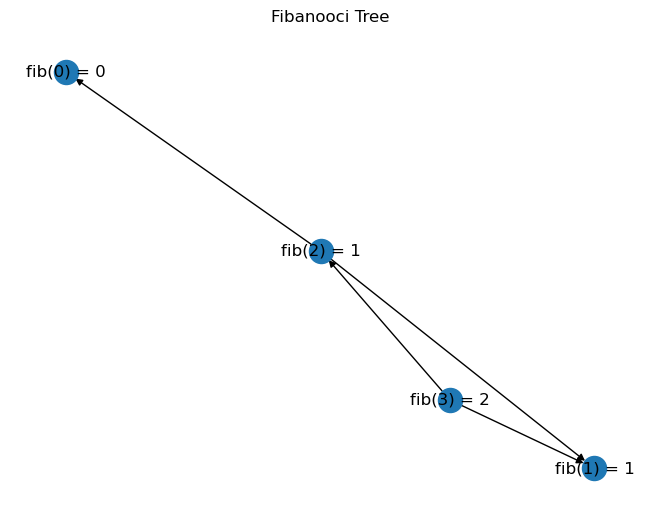

In [53]:
fibonacci(3)
fibonacci.visalizer()

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization).
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [58]:
def memoizer(func):
    cache = {}
    @wraps(func)
    def wrapper(*args,**kwargs):
      key = args + tuple(kwargs.items())
      if key not in cache:
        cache[key] = func(*args,**kwargs)
      return cache[key]
    return wrapper

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
@profiler
@visulaize
@memoizer
def fibonacci(n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fibonacci(n-1) + fibonacci(n-2)

5
Fib(5) =  5
TIME TAKEN: 3.981590270996094e-05


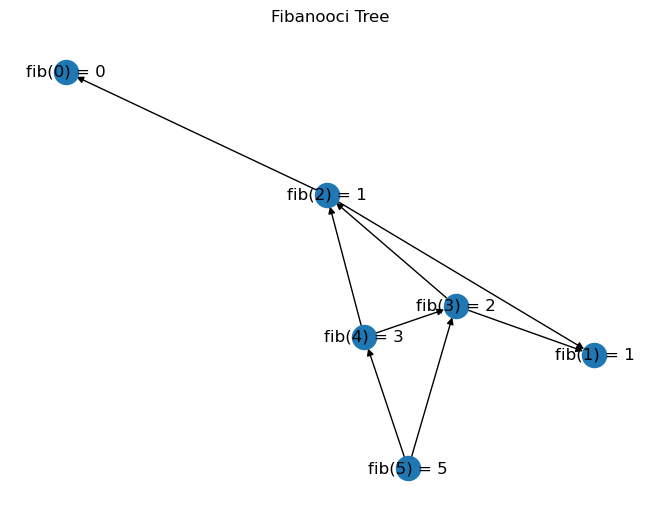

In [60]:
print(fibonacci(5))
print("Fib(5) = ",fibonacci(5))
print("TIME TAKEN:" , fibonacci.last_time_taken)
fibonacci.visalizer()

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

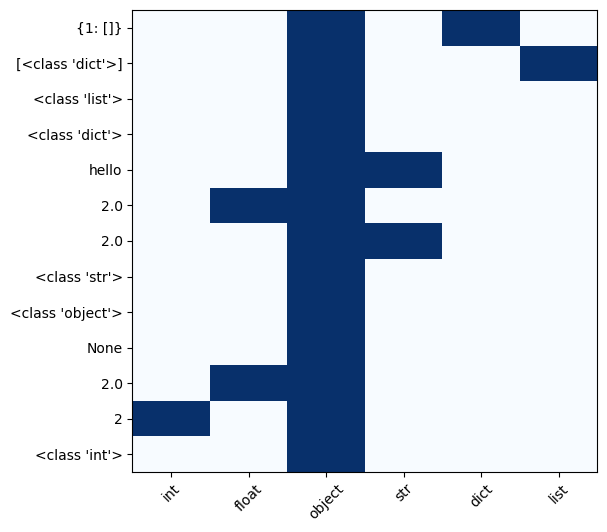

In [44]:
mat = np.array([[isinstance(obj,typ) for typ in list_of_types] for obj in list_of_objects])
plt.figure(figsize=(6,6))
plt.pcolormesh(mat,cmap="Blues")
plt.xticks(np.arange(len(list_of_types))+0.5,[typ.__name__ for typ in list_of_types],rotation = 45)
plt.yticks(np.arange(len(list_of_objects)) + 0.5, [str(obj) for obj in list_of_objects])
plt.show()